In [1]:
import numpy as npp
import minpy.numpy as np
from minpy.nn import layers
from minpy.nn.model import ModelBase
from nn.solver import Solver
from minpy.nn.io import NDArrayIter
from minpy.core import convert_args
import matplotlib.pyplot as plt
import minpy
minpy.set_global_policy(minpy.OnlyNumPyPolicy())
from GRURNN import GRURNN
#from SimRat import SimRat

from dataProcessFunctions import *

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

allRatsData = getData(1)

MySQLdb not found
Using mysql.connector
Loaded defaults from ~/.dbconf
Z009 (10443, 6)


In [2]:
N = 30
rats = preProcess(allRatsData,N, ratnames=['Z009'])

In [4]:
rat = rats['Z009']
RNN = GRURNN(N=N, hidden_dim=50, reg=0.05, p=0.5)

solver = Solver(RNN,
                rat.trainX, rat.trainY,
                rat.valX, rat.valY,
                num_epochs=100,
                batch_length = 10,
                init_rule='xavier',
                update_rule='adam',
                optim_config={
                      'learning_rate': 5e-4,
                    },
                verbose=True,
               )
solver.init()
solver.train()

(Iteration 1 / 2500) loss: 25.006100
(Epoch 1 / 100) train acc: 0.3248, val_acc: 0.314444444444, time: 4.48290896416.
(Iteration 26 / 2500) loss: 22.841249
(Epoch 2 / 100) train acc: 0.330133333333, val_acc: 0.303333333333, time: 3.8861181736.
(Iteration 51 / 2500) loss: 21.728514
(Epoch 3 / 100) train acc: 0.345466666667, val_acc: 0.326666666667, time: 4.20346188545.
(Iteration 76 / 2500) loss: 21.218773
(Epoch 4 / 100) train acc: 0.3496, val_acc: 0.33, time: 3.79856395721.
(Iteration 101 / 2500) loss: 21.462861
(Epoch 5 / 100) train acc: 0.349866666667, val_acc: 0.33, time: 3.49908304214.
(Iteration 126 / 2500) loss: 20.848208
(Epoch 6 / 100) train acc: 0.3536, val_acc: 0.337777777778, time: 2.92776107788.
(Iteration 151 / 2500) loss: 19.961081
(Epoch 7 / 100) train acc: 0.352666666667, val_acc: 0.324444444444, time: 2.86395382881.
(Iteration 176 / 2500) loss: 20.469363
(Epoch 8 / 100) train acc: 0.3576, val_acc: 0.334444444444, time: 2.8352560997.
(Iteration 201 / 2500) loss: 19.565

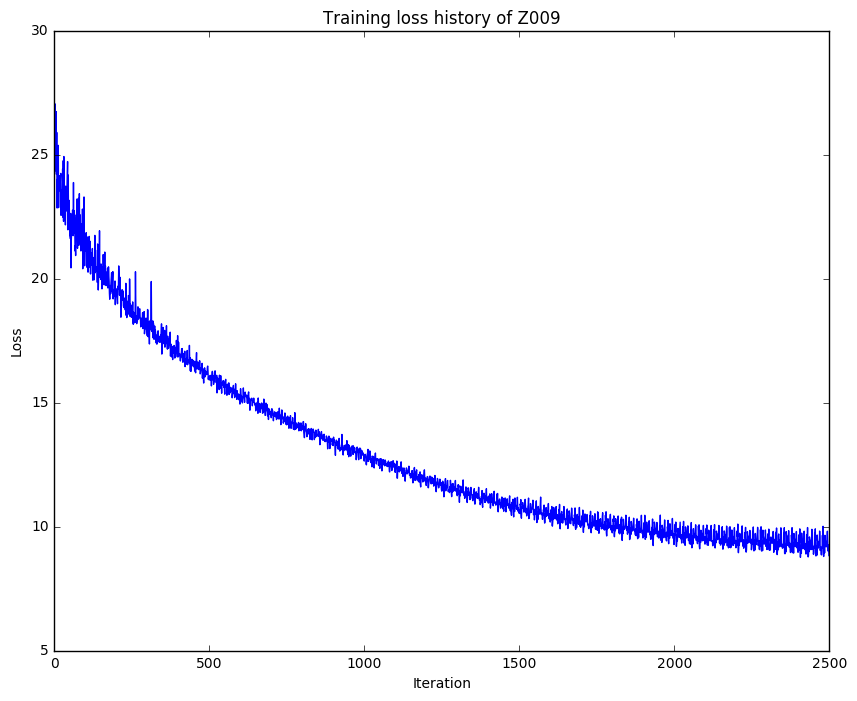

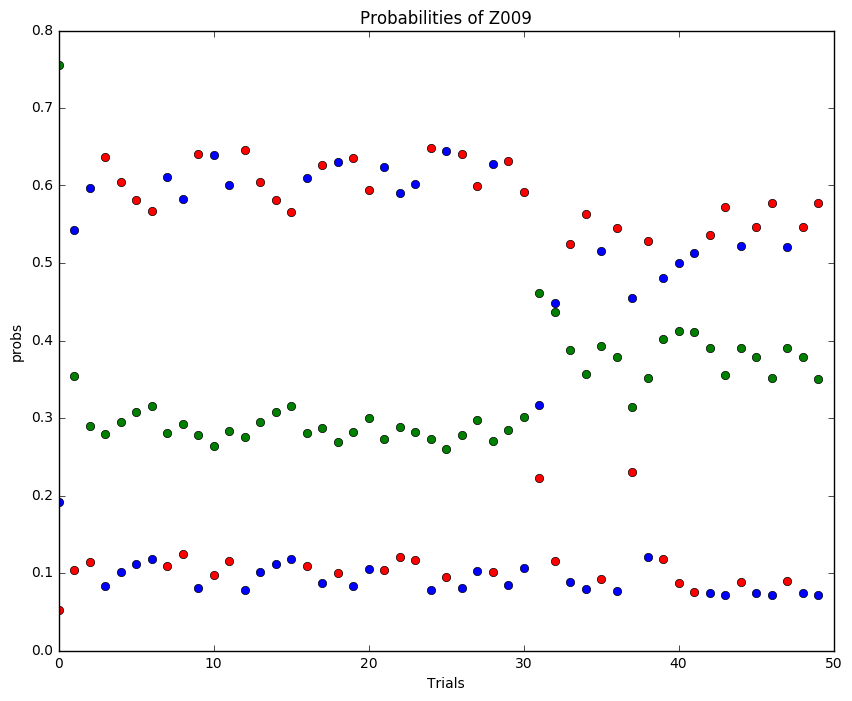

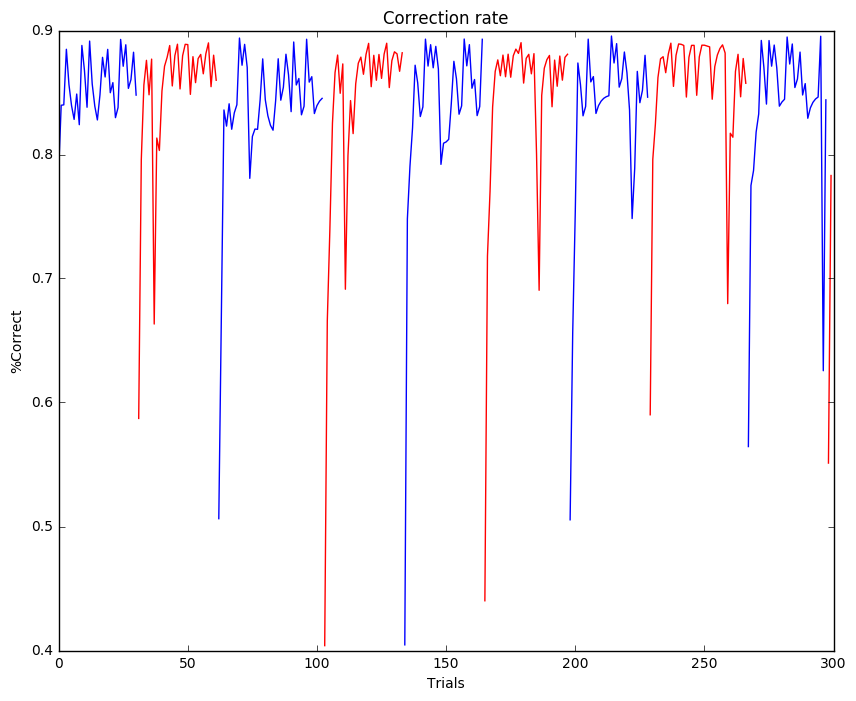

The sum of square bias between the model and real rat's data on pro to anti is 0.043456
The sum of square bias between the model and real rat's data on anti to pro is 0.021246
The mean of two sum of square bias is 0.032351
The correlation coefficient between the model and real rat's data on pro to anti is 0.986202
The correlation coefficient between the model and real rat's data on anti to pro is 0.982497
The mean correlation coefficients is 0.984349


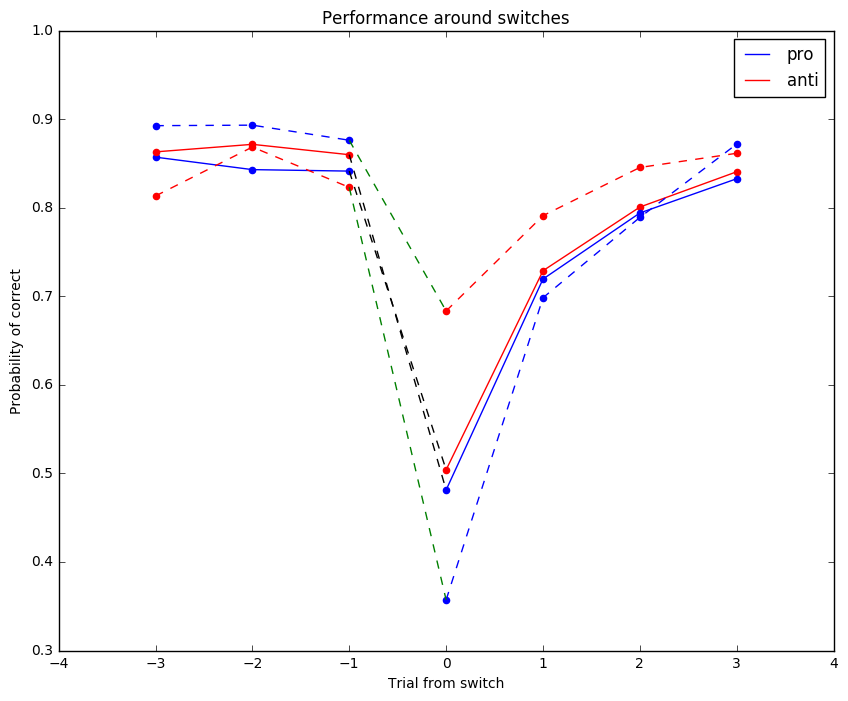

In [5]:
probs = rat.predict(RNN)
ratname = 'Z009'
loss_history(solver, ratname)
sample_probabilities(probs, ratname, sample = 50)
sample_correct_rate(rat, sample = 300)
trial_window = 3

real_p2a, real_a2p = realRatSwitchCost(rats,trial_window = trial_window)
p2a, a2p = meanPerformance(rats, trial_window = trial_window)

bias_p2a = bias(real_p2a, p2a)
bias_a2p = bias(real_a2p, a2p)
bias_mean = np.mean([bias_p2a,bias_a2p])

rp2a = corr(real_p2a, p2a)
ra2p = corr(real_a2p, a2p)
r_mean = np.mean([rp2a,ra2p])

print "The sum of square bias between the model and real rat's data on pro to anti is %f" % (bias_p2a,)
print "The sum of square bias between the model and real rat's data on anti to pro is %f" % (bias_a2p,)
print "The mean of two sum of square bias is %f" % (bias_mean,)

print "The correlation coefficient between the model and real rat's data on pro to anti is %f" % (rp2a,)
print "The correlation coefficient between the model and real rat's data on anti to pro is %f" % (ra2p,)
print "The mean correlation coefficients is %f" % (r_mean,)

draw_3d(real_p2a, real_a2p, p2a, a2p, trial_window = 3)


In [10]:
solver.change_settings(learning_rate = 1e-5)
solver.train()

(Iteration 1 / 2500) loss: 8.554312
(Epoch 1 / 100) train acc: 0.583333333333, val_acc: 0.511111111111, time: 3.27787709236.
(Iteration 26 / 2500) loss: 8.601430
(Epoch 2 / 100) train acc: 0.583466666667, val_acc: 0.511111111111, time: 2.83773112297.
(Iteration 51 / 2500) loss: 8.450244
(Epoch 3 / 100) train acc: 0.5836, val_acc: 0.511111111111, time: 3.24380898476.
(Iteration 76 / 2500) loss: 8.605558
(Epoch 4 / 100) train acc: 0.5824, val_acc: 0.511111111111, time: 2.81268191338.
(Iteration 101 / 2500) loss: 8.616583
(Epoch 5 / 100) train acc: 0.582933333333, val_acc: 0.511111111111, time: 2.83877205849.
(Iteration 126 / 2500) loss: 8.569231
(Epoch 6 / 100) train acc: 0.583733333333, val_acc: 0.512222222222, time: 3.16492700577.
(Iteration 151 / 2500) loss: 8.426603
(Epoch 7 / 100) train acc: 0.583733333333, val_acc: 0.51, time: 3.33616995811.
(Iteration 176 / 2500) loss: 8.539470
(Epoch 8 / 100) train acc: 0.583733333333, val_acc: 0.513333333333, time: 3.29113507271.
(Iteration 201 

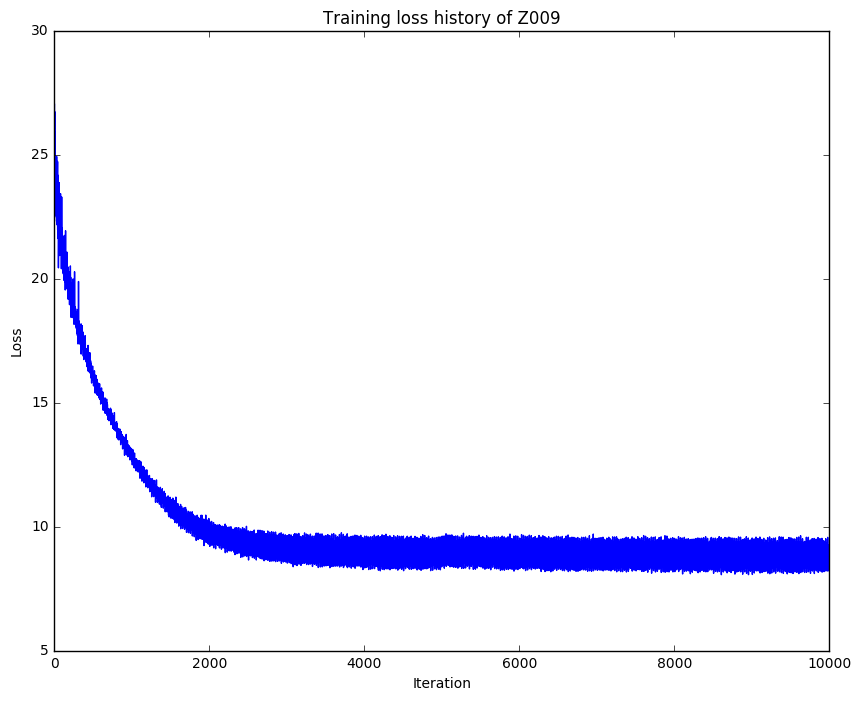

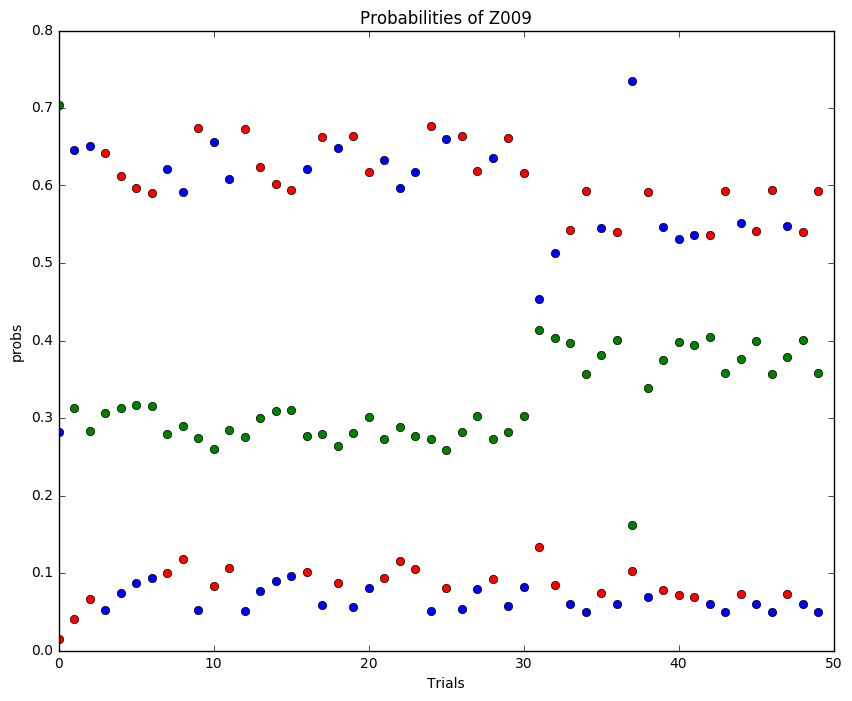

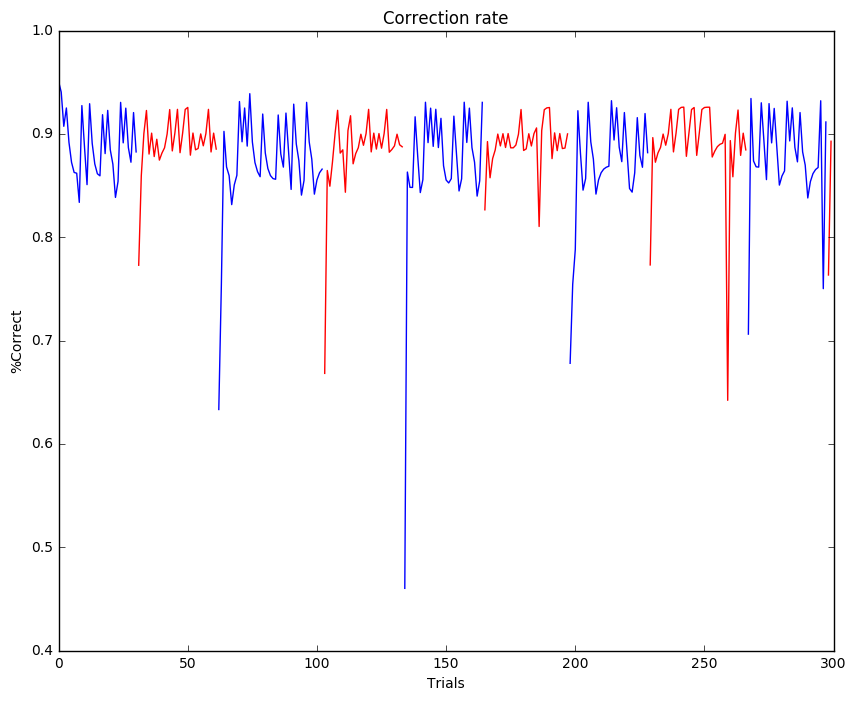

The sum of square bias between the model and real rat's data on pro to anti is 0.017087
The sum of square bias between the model and real rat's data on anti to pro is 0.092830
The mean of two sum of square bias is 0.054959
The correlation coefficient between the model and real rat's data on pro to anti is 0.935811
The correlation coefficient between the model and real rat's data on anti to pro is 0.983216
The mean correlation coefficients is 0.959513


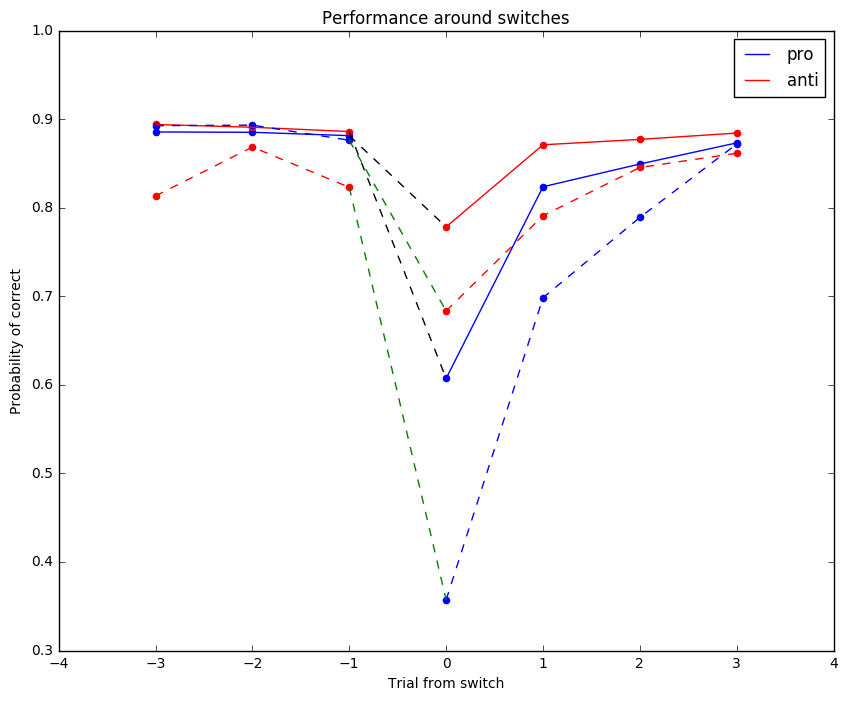

In [11]:
probs = rat.predict(RNN)
ratname = 'Z009'
loss_history(solver, ratname)
sample_probabilities(probs, ratname, sample = 50)
sample_correct_rate(rat, sample = 300)
trial_window = 3

real_p2a, real_a2p = realRatSwitchCost(rats,trial_window = trial_window)
p2a, a2p = meanPerformance(rats, trial_window = trial_window)

bias_p2a = bias(real_p2a, p2a)
bias_a2p = bias(real_a2p, a2p)
bias_mean = np.mean([bias_p2a,bias_a2p])

rp2a = corr(real_p2a, p2a)
ra2p = corr(real_a2p, a2p)
r_mean = np.mean([rp2a,ra2p])

print "The sum of square bias between the model and real rat's data on pro to anti is %f" % (bias_p2a,)
print "The sum of square bias between the model and real rat's data on anti to pro is %f" % (bias_a2p,)
print "The mean of two sum of square bias is %f" % (bias_mean,)

print "The correlation coefficient between the model and real rat's data on pro to anti is %f" % (rp2a,)
print "The correlation coefficient between the model and real rat's data on anti to pro is %f" % (ra2p,)
print "The mean correlation coefficients is %f" % (r_mean,)

draw_3d(real_p2a, real_a2p, p2a, a2p, trial_window = 3)
